---
<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 사이킷런을 사용한 Boston 집값 예측
  </h2>
</div>

<img src = "https://cdn10.bostonmagazine.com/wp-content/uploads/sites/2/2018/05/boston-rent.jpg" width = "700" >


이번 실습 시간에 다뤄볼 데이터는 보스턴 시의 주택 가격과 관련된 데이터입니다.

- 주택 가격에 영향을 끼치는 여러 요소들 (X, Features)
- 주택 가격 (Y, Target)


## 변수설명 

1) Target (Y) data
* Target: 1978년 보스턴 주택 가격

2) Feature (X) data
* CRIM: 범죄율
* INDUS: 비소매상업지역 면적 비율
* NOX: 일산화질소 농도
* RM: 주택당 방 개수
* LSTAT: 인구 중 하위 계층 비율
* B: 인구 중 흑인 비율
* PTRATIO: 학생/교사 비율
* ZN: 25,000 평방피트를 초과하는 거주지역 비율
* CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
* AGE: 1940년 이전에 건축된 주택의 비율
* RAD: 방사형 고속도로까지의 거리
* DIS: 직업센터의 거리
* TAX: 재산세율

---

## 데이터 살펴보기 

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, 
                         columns=boston.feature_names, 
                         index=range(1,len(boston.data)+1))
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 정방향 학습 알아보기
  </h2>
</div>

### 순서
1. 무작위로 $w,b$ 정하기
2. 샘플 하나 ($x_0$)에 대하여 $\hat y_0$ 계산하기 
3. $\hat y$ and $y$  비교 
4. $\hat y - y $ 이 작아지도록 $w,b$ update
5. For all samples, 같은 작업 반복하기 


In [37]:
x0 = boston_df['RM'].iloc[0]
y0 = boston_df['PRICE'].iloc[0]
print('독립변수(X): ',x0)
print('종속변수(y):',y0)

독립변수(X):  6.575
종속변수(y): 24.0


In [38]:
# 1. 초기값 설정 (무작위로 w,b 정하기)
w0 = 1.0 
b0 = 1.0
print('초기 가중치:',w_0)
print('초기 편향값:',b_0)

초기 가중치: 1.0
초기 편향값: 1.0


In [ ]:
# 2. 샘플 하나 x0에 대하여 hat y0 구하기 
from IPython.display import display, Markdown

# y_hat = b0 + w0*x0
# w, b 가 바뀔대  y_hat 이 어떻게 변하는지 확인 
y0_hat = b0 + x0*w0

In [40]:
# 3. 비교 
display(Markdown(rf"""$\hat y_0: {y0_hat}$"""))
display(Markdown(rf"""$y_0: {y0}$"""))

$\hat y_0: 7.575$

$y_0: 24.0$

In [41]:
# 4. 오차(hat y - y)가 작아지도록 (w,b) update

w1 = 5.0 
b1 = 5.0
print('두번째 가중치:',w1)
print('두번째 편향값:',b1)

두번째 가중치: 5.0
두번째 편향값: 5.0


In [43]:
# 5. 다음 샘플 가져오기 
x1 = boston_df['RM'].iloc[1]
y1 = boston_df['PRICE'].iloc[1]

In [44]:
# 5. hat y1 구하기 
from IPython.display import display, Markdown

# y_hat = b0 + w0*x0
y1_hat = b1 + x1*w1

In [45]:
# 6. 다시 비교 
display(Markdown(rf"""$\hat y_1: {y1_hat}$"""))
display(Markdown(rf"""$y_1 : {y1}$"""))

$\hat y_1: 37.105000000000004$

$y_1 : 21.6$

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 역전파 학습법 알아보기
  </h2>
</div>


## 회귀식 정의하기 
$$ \hat{y} = b+ w X$$

## 제곱 오차 정의하기
$$ Residual = (y - \hat{y})^2$$

## 가중치에 대하여 제곱오차 미분하기 
$$\frac{\partial \mbox{Residual}}{\partial w} = \frac{\partial(y - \hat{y})^2}{\partial w}$$
$$\quad \qquad \qquad \qquad  = 2(y - \hat{y})(-\frac{\partial}{\partial w}\hat{y}) $$
$$\quad \qquad \qquad  \mbox{ } \mbox{ }  = 2(y - \hat{y})(-x) $$

## 가중치 업데이트 
손실함수의 낮은 쪽으로 가고 싶기 떄문에 미분값을 빼줌.
$$ w_{n+1} = w_n  - \frac{\partial \mbox{Residual}}{\partial w} $$ 
$$ w_{n+1} = w_n  + 2(y - \hat{y})(x)$$

## 절편에 대하여 제곱오차 미분하기 
$$\frac{\partial \mbox{Residual}}{\partial b} = \frac{\partial(y - \hat{y})^2}{\partial b}$$
$$\quad \qquad \qquad \qquad  = 2(y - \hat{y})(-\frac{\partial}{\partial b}\hat{y}) $$
$$\quad \qquad \qquad  \mbox{ } \mbox{ }  = 2(y - \hat{y})(-1) $$

## 절편 업데이트 
손실함수의 낮은 쪽으로 가고 싶기 떄문에 미분값을 빼줌.
$$ b_{n+1} = b_n  - \frac{\partial \mbox{Residual}}{\partial b} $$ 
$$ b_{n+1} = b_n  + 2(y - \hat{y})$$

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> Class 만들기
  </h2>
</div>

In [ ]:
class LinearRegression:

    def __init__(self):
        self.w = 1.0     # initailize weight
        self.b = 1.0     # initailize intecept 
        self.lr = 0.01
        
    def forpass(self, x):
        y_hat = x * self.w + self.b       # calcuate y = wx + b
        return y_hat

    def backprop(self, x, err):
        w_grad = 2* x * err    # cacluate gradient of weight
        b_grad = 2* 1 * err    # cacluate gradient of intecept
        return w_grad, b_grad

    def fit(self, x, y, epochs=5):
        for i in range(epochs):           # repeat depend on epoch 
            count=0
            for x_i, y_i in zip(x, y):    # repeat for all samples
                count+=1
                y_hat = self.forpass(x_i)  # forward 
                err = - (y_i - y_hat )     # backpropagation*
                w_grad, b_grad = self.backprop(x_i, err)  # calculate backpropagation
                
                # update 
                self.w -= self.lr*w_grad          # weight update
                self.b -= self.lr*b_grad          # intecept update 


                

In [ ]:
class LinearRegression:

    def __init__(self):
        self.w = 1.0     # initailize weight
        self.b = 1.0     # initailize intecept 
        self.lr = 0.01
        
    def forpass(self, x):
        y_hat = x * self.w + self.b       # calcuate y = wx + b
        return y_hat

    def backprop(self, x, err):
        w_grad =(-1) *2* x * err    # cacluate gradient of weight
        b_grad = (-1)*2* 1 * err    # cacluate gradient of intecept
        return w_grad, b_grad

    def fit(self, x, y, epochs=5):
        for i in range(epochs):           # repeat depend on epoch 
            for x_i, y_i in zip(x, y):    # repeat for all samples
                y_hat = self.forpass(x_i)  # forward 
                
                err = (y_i - y_hat )     # backpropagation*
                w_grad, b_grad = self.backprop(x_i, err)  # calculate backpropagation
                
                # update 
                self.w -= self.lr*w_grad          # weight update
                self.b -= self.lr*b_grad          # intecept update 
    


                

In [98]:
class LinearRegression:

    def __init__(self):
        self.w = 1.0     # initailize weight
        self.b = 1.0     # initailize intecept 
        self.lr = 0.01
        
    def forpass(self, x):
        y_hat = x * self.w + self.b       # calcuate y = wx + b
        return y_hat

    def backprop(self, x, err):
        w_grad =(-1) *2* x * err    # cacluate gradient of weight
        b_grad = (-1)*2* 1 * err    # cacluate gradient of intecept
        return w_grad, b_grad

    def fit(self, x, y, epochs=5):
        for i in range(epochs):           # repeat depend on epoch 
            for x_i, y_i in zip(x, y):    # repeat for all samples
                y_hat = self.forpass(x_i)  # forward 
                err = (y_i - y_hat )     # backpropagation*
                w_grad, b_grad = self.backprop(x_i, err)  # calculate backpropagation
                
             #   print("linear grad:", w_grad)
              #  print("bias grad: ", b_grad)
                # update 
                self.w -= self.lr*w_grad          # weight update
                self.b -= self.lr*b_grad          # intecept update 
              #  print("new linear weight: ",self.w)
              #  print("new bias weight: ",self.b)


                

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 실제 데이터로 선형회귀 해보기
  </h2>
</div>

In [99]:
# TODO
X = boston_df['RM'].astype(np.float)
y = boston_df['PRICE'].astype(np.float)

In [100]:
LinearRegression = LinearRegression()
LinearRegression.fit(X, y)

In [101]:
print('가중치(w): {:3f}  , 절편(b): {:3f}'.format(LinearRegression.w,LinearRegression.b) )

가중치(w): 2.707922  , 절편(b): -2.553951


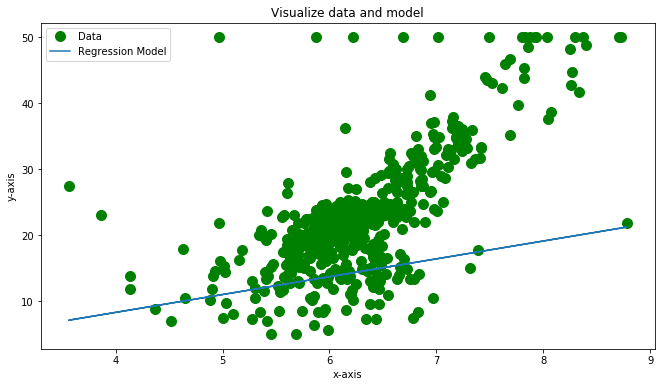

In [102]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(11,6))
plt.title('Visualize data and model')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(X, y, 'go', label='Data', marker='o', markersize=10)
plt.plot(X, LinearRegression.w*X + LinearRegression.b, label='Regression Model')
plt.legend();
plt.show()